In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ST1_CaptoneProject_Demos

/content/drive/MyDrive/ST1_CaptoneProject_Demos


In [3]:
#Import Required Packages for EDA 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
#Read the dataset/s

df = pd.read_csv('/content/drive/MyDrive/ST1_CaptoneProject_Demos/penguins_new.csv')


In [6]:
#(1)	The EDA starts with  understanding the basic description of data as described next:
#1. Checking description(first 5 and last 5 rows)
df.head() 


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,gender
0,Adelie,Torgersen,39.1,18.7,181,3750,2007,1
1,Adelie,Torgersen,39.5,17.4,186,3800,2007,0
2,Adelie,Torgersen,40.3,18.0,195,3250,2007,0
3,Adelie,Torgersen,36.7,19.3,193,3450,2007,0
4,Adelie,Torgersen,39.3,20.6,190,3650,2007,1


In [7]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,gender
328,Chinstrap,Dream,55.8,19.8,207,4000,2009,1
329,Chinstrap,Dream,43.5,18.1,202,3400,2009,0
330,Chinstrap,Dream,49.6,18.2,193,3775,2009,1
331,Chinstrap,Dream,50.8,19.0,210,4100,2009,1
332,Chinstrap,Dream,50.2,18.7,198,3775,2009,0


In [8]:
df.shape

(333, 8)

In [9]:
# name of the attributes
df.columns
 

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year', 'gender'],
      dtype='object')

In [10]:
#unique values for each attribute
df.nunique()


species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
year                   3
gender                 2
dtype: int64

In [11]:
#Complete info about data frame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   year               333 non-null    int64  
 7   gender             333 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 20.9+ KB


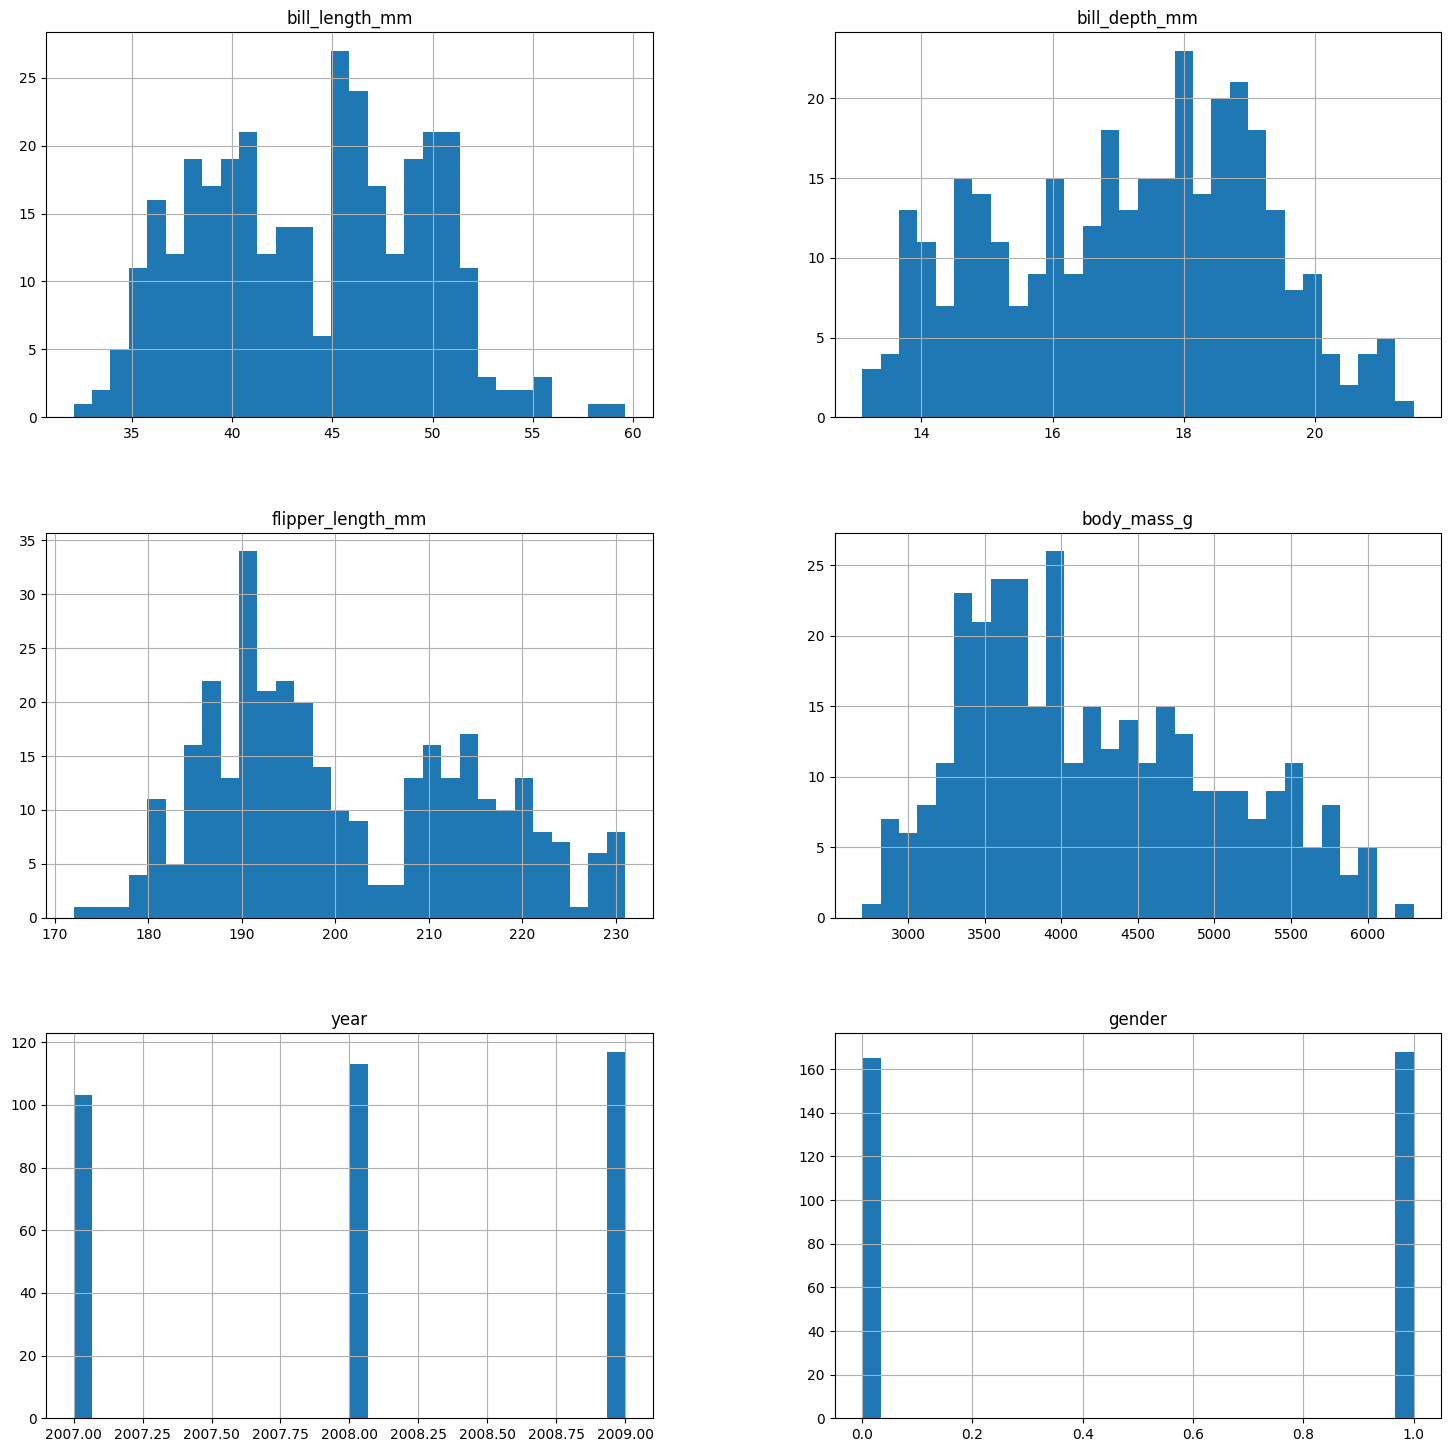

In [12]:
#3. Visualising data  distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()


Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


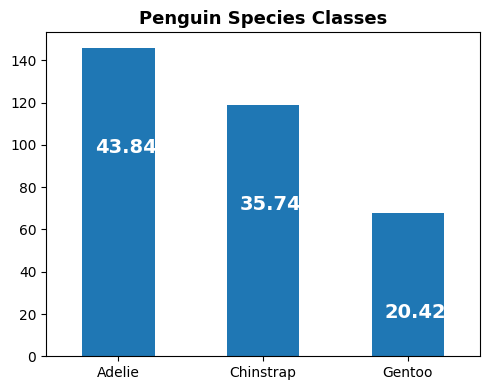

In [15]:

#checking target value distribution
print(df.species.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Adelie", "Chinstrap", "Gentoo"]
ax = df.species.value_counts().plot(kind='bar')
ax.set_title("Penguin Species Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()


In [16]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 17.8 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=333f9be16830b01063c6d50c20cec5e5ceeeb8d925a51b76ce40ab373c77b62c
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [17]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Penguin Species EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,gender
0,0.0,2.0,39.1,18.7,181,3750,2007,1
1,0.0,2.0,39.5,17.4,186,3800,2007,0
2,0.0,2.0,40.3,18.0,195,3250,2007,0
3,0.0,2.0,36.7,19.3,193,3450,2007,0
4,0.0,2.0,39.3,20.6,190,3650,2007,1
...,...,...,...,...,...,...,...,...
328,1.0,1.0,55.8,19.8,207,4000,2009,1
329,1.0,1.0,43.5,18.1,202,3400,2009,0
330,1.0,1.0,49.6,18.2,193,3775,2009,1
331,1.0,1.0,50.8,19.0,210,4100,2009,1


In [25]:
class_label =df['species']
df = df.drop(['species'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['species']=class_label
df


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,gender,species
0,1.0,0.254545,0.666667,0.152542,0.291667,0.0,1.0,0.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0,0.0,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0,0.0,0.0
3,1.0,0.167273,0.738095,0.355932,0.208333,0.0,0.0,0.0
4,1.0,0.261818,0.892857,0.305085,0.263889,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
328,0.5,0.861818,0.797619,0.593220,0.361111,1.0,1.0,1.0
329,0.5,0.414545,0.595238,0.508475,0.194444,1.0,0.0,1.0
330,0.5,0.636364,0.607143,0.355932,0.298611,1.0,1.0,1.0
331,0.5,0.680000,0.702381,0.644068,0.388889,1.0,1.0,1.0


In [2]:
#pre-processing
penguin_data = df.copy()
le = preprocessing.LabelEncoder()
island = le.fit_transform(list(penguin_data["island"])) 
gender = le.fit_transform(list(penguin_data["gender"])) 
bill_length = le.fit_transform(list(penguin_data["bill_length_mm"])) 
bill_depth = le.fit_transform(list(penguin_data["bill_depth_mm"])) 
flipper_length = le.fit_transform(list(penguin_data["flipper_length_mm"])) 
body_mass = le.fit_transform(list(penguin_data["body_mass_g"])) 
year = le.fit_transform(list(penguin_data["year"]))  
ps = le.fit_transform(list(penguin_data["species"])) 



NameError: name 'df' is not defined

In [29]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [30]:
x = list(zip(island, gender, bill_length, bill_depth, flipper_length, body_mass, year))
y = list(ps)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows

#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((266, 7), (67, 7))

In [31]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.924668 (0.043149)

SVM: 0.985115 (0.021609)

GBM: 0.985115 (0.021609)

RF: 0.977568 (0.018102)



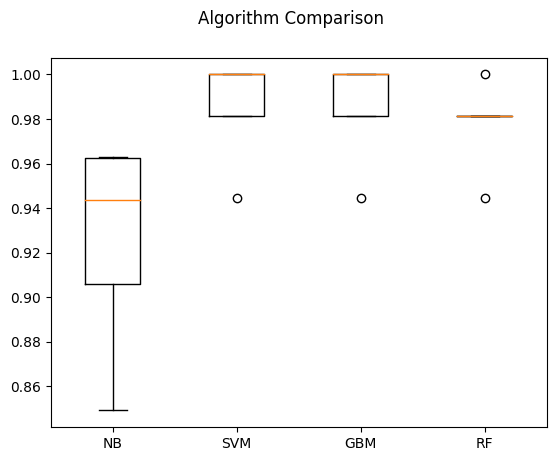

In [32]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [33]:
#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset

svm = SVC()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

best_model = svm

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Best Model Accuracy Score on Test Set: 0.9850746268656716


In [34]:
#Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        22

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



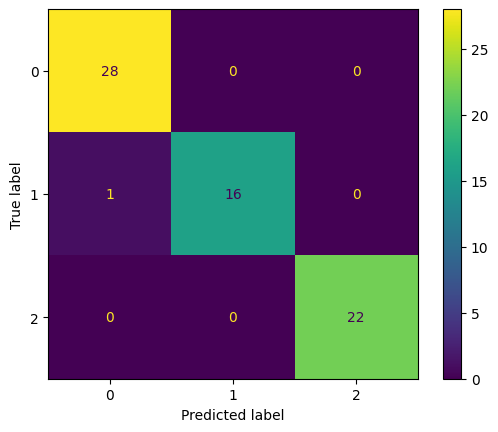

In [35]:
#Model Performance Evaluation Metric 2
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [40]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)



Predicted:  1 Actual:  1 Data:  (1, 1, 155, 68, 28, 53, 1)
Predicted:  2 Actual:  2 Data:  (0, 1, 142, 34, 48, 76, 2)
Predicted:  0 Actual:  0 Data:  (2, 1, 46, 53, 14, 36, 1)
Predicted:  0 Actual:  0 Data:  (2, 1, 65, 60, 19, 39, 1)
Predicted:  1 Actual:  1 Data:  (1, 0, 93, 39, 19, 26, 2)
Predicted:  2 Actual:  2 Data:  (0, 0, 73, 0, 38, 71, 0)
Predicted:  0 Actual:  0 Data:  (1, 0, 26, 37, 16, 4, 2)
Predicted:  0 Actual:  0 Data:  (1, 1, 42, 76, 20, 43, 0)
Predicted:  2 Actual:  2 Data:  (0, 0, 91, 14, 35, 62, 2)
Predicted:  0 Actual:  0 Data:  (0, 0, 11, 31, 19, 15, 1)
Predicted:  1 Actual:  1 Data:  (1, 0, 96, 58, 19, 43, 0)
Predicted:  1 Actual:  1 Data:  (1, 1, 127, 51, 17, 31, 2)
Predicted:  2 Actual:  2 Data:  (0, 1, 127, 19, 39, 62, 1)
Predicted:  1 Actual:  1 Data:  (1, 0, 98, 44, 11, 26, 1)
Predicted:  0 Actual:  0 Data:  (1, 1, 55, 58, 8, 36, 0)
Predicted:  0 Actual:  0 Data:  (2, 0, 16, 41, 11, 8, 2)
Predicted:  2 Actual:  2 Data:  (0, 1, 116, 15, 36, 88, 0)
Predicted:  0